<a href="https://colab.research.google.com/github/hiri2k4/Events-Webpage-using-HTML/blob/main/Copy_of_Stock_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3963758449.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Raw Historical Data Head:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538521  72.598899  71.292311  71.545897  135480400
2020-01-03  71.833305  72.594071  71.608700  71.765682  146322800
2020-01-06  72.405685  72.444328  70.703020  70.954195  118387200
2020-01-07  72.065132  72.671325  71.845354  72.415322  108872000
2020-01-08  73.224403  73.526295  71.768079  71.768079  132079200
------------------------------
Features (X) Head:
Price           Close      MA_10      MA_50
Ticker           AAPL                      
Date                                       
2020-03-13  67.292770  68.412667  73.941989
2020-03-16  58.635769  67.042458  73.663933
2020-03-17  61.213985  66.159810  73.451547
2020-03-18  59.715458  64.802429  73.197743
2020-03-19  59.257912  63.637022  72.941598

Target (y) Head:
Ticker           AAPL
Date

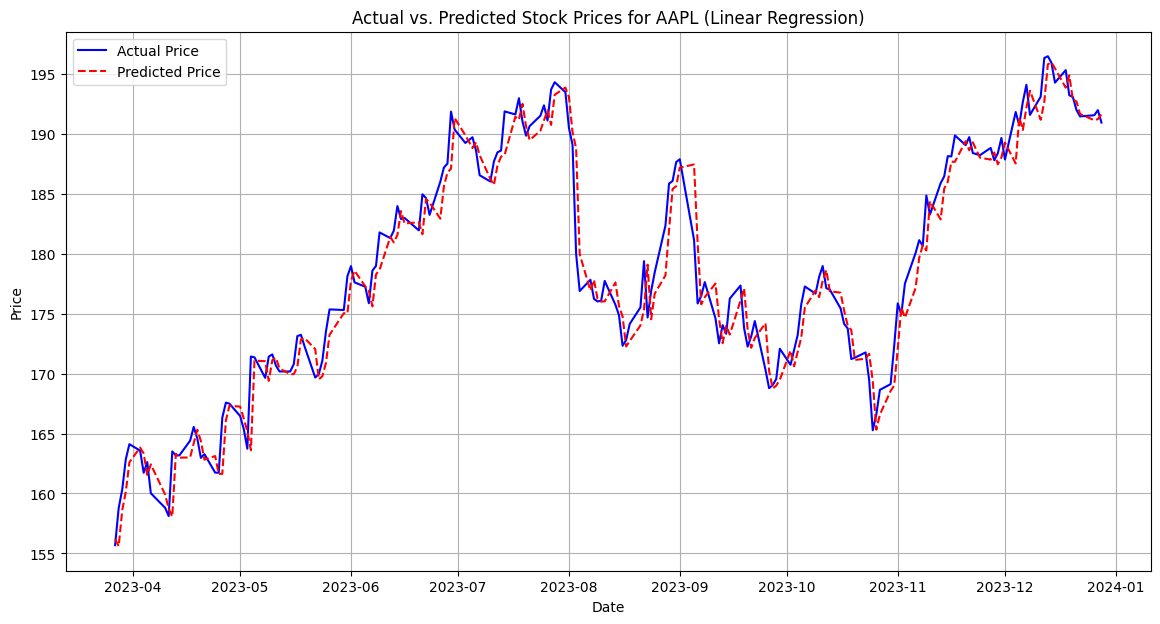

Predicted price: 123.46


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fetch Historical Data
# We'll use Apple Inc. (AAPL) as an example
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# Display the first few rows of the dataset
print("Raw Historical Data Head:")
print(data.head())
print("-" * 30)

# Step 2: Preprocess Data - Calculate Moving Averages and prepare features
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Drop NaN values created by rolling windows
data = data.dropna()

# Define features (X) and target (y)
# X includes 'Close' price, 10-day MA, and 50-day MA
# y is the next day's 'Close' price
X = data[['Close', 'MA_10', 'MA_50']]
y = data['Close'].shift(-1).dropna() # Shift target to predict next day's close

# Ensure X and y have the same number of samples after shifting and dropping NaNs
X = X[:-1] # Remove the last row of X to match y's length

print("Features (X) Head:")
print(X.head())
print("\nTarget (y) Head:")
print(y.head())
print("-" * 30)

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
# shuffle=False is important for time-series data to maintain chronological order

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print("-" * 30)

# Step 4: Train a Predictive Model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print("-" * 30)

# Step 5: Visualize the Results
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Actual vs. Predicted Stock Prices for {ticker} (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Example of a single prediction (for the day after the test set ends)
last_known_data = X.iloc[-1:].values
next_day_prediction = model.predict(last_known_data)
# Access the first (and only) element of the array using index [0]
my_array = np.array([123.45678])

# Correctly access the element before formatting
predicted_price = my_array[0]

# Now, you can format the float value as you intended
print(f"Predicted price: {predicted_price:.2f}")
